In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

[]


In [3]:
import cv2
import imghdr

In [6]:
data_dir = 'Data'

In [8]:
os.listdir(os.path.join(data_dir,'happy'))

['es_27x40_pre_final_en-us_cps_custom-c5a0cc5b4b5b0d8a651ee346a042970c45cf3475.jpg',
 'traitshappypeople.jpg',
 'portrait-young-father-carrying-his-260nw-736997836.jpg',
 '05-12-21-happy-people.jpg',
 'happy-person.jpeg',
 'happy-people.jpeg',
 'Successful-year.jpg',
 'o-HAPPY-facebook.jpg',
 'smile.woman_.jpg',
 'image_jumpstory-download20230421-155938_7a7b427.jpg',
 'hand-drawn-happy-people-jumping_23-2149092878.jpg',
 'ce529eea8c0ca9987656fa90474563d6.jpg',
 'happy-people-group-fb.jpg',
 'Happy20People.jpg',
 'nm-how-happiness-affects-health-tnail.jpg',
 'group-of-happy-people-2.jpg',
 'happy-person-banner-1.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 'GettyImages-454356720.jpg',
 'ipsos-global-advisor-happiness-2022-opti.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'Happy-people-800x533.jpg',
 '6a4264642bba4cbce747ef68613fa71122b7db1f8ab4fa1c7bedeab635dd1146.png',
 'group-people-posing-pho

In [9]:
os.listdir()

['.config', 'Data', '.ipynb_checkpoints', 'sample_data']

In [10]:
img_exts = ['jpeg','jpg','bmp','png']

In [12]:
for image in os.listdir(os.path.join(data_dir,'happy')):
  img_path = os.path.join(data_dir,'happy', image)
  try:
    img = cv2.imread(img_path)
    tip = imghdr.what(img_path)
    if tip not in img_exts:
      os.remove(img_path)
  except Exception as e:
    print('There is some issue', e)

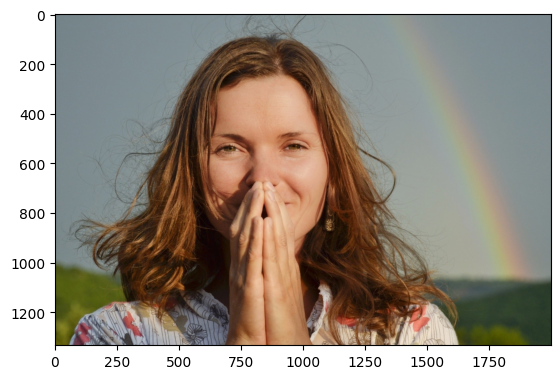

In [17]:
img = cv2.imread(os.path.join(data_dir,'happy', '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [84]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 169 files belonging to 2 classes.


In [86]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [87]:
batch = data_iterator.next()

In [88]:
batch[0].shape

(32, 256, 256, 3)

In [89]:
batch[1]

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

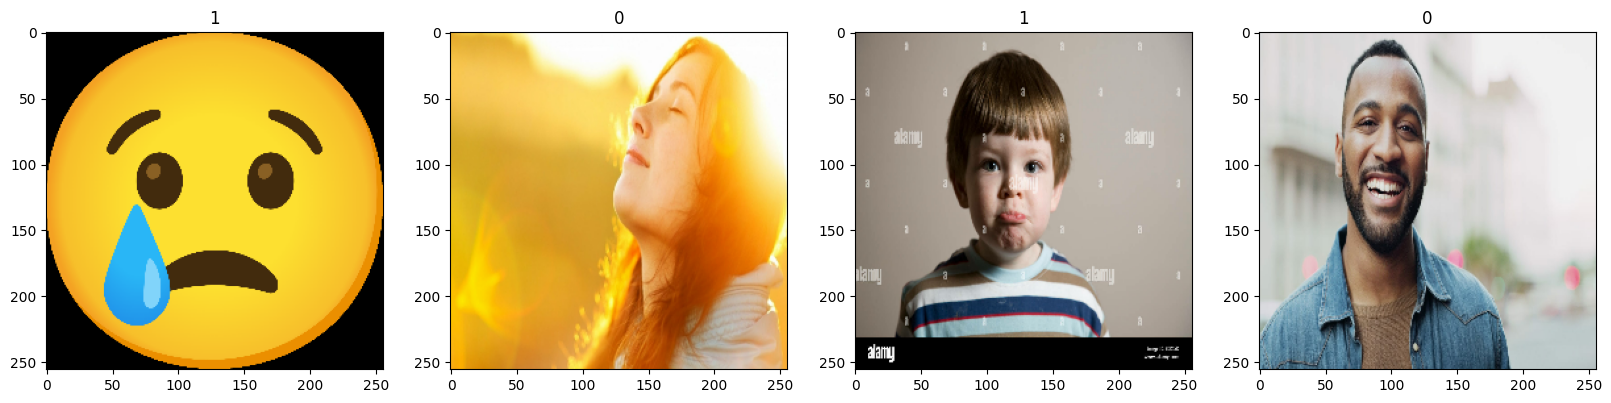

In [90]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [91]:
scaled = batch[0]/255
scaled.max()

1.0

In [92]:
data = data.map(lambda x,y: (x/255, y))

In [93]:
scaled_iterator = data.as_numpy_iterator()

In [94]:
batch = scaled_iterator.next()

In [96]:
batch[1]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

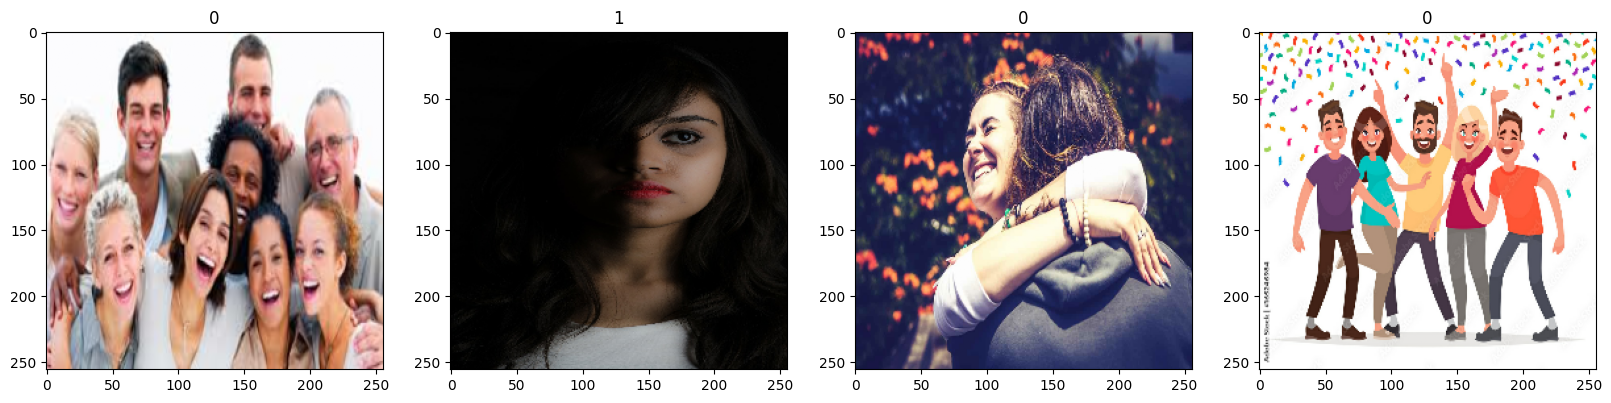

In [97]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [98]:
len(data)

6

In [112]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

1

In [114]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [116]:
model = Sequential()

In [117]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [118]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [119]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [120]:
logdir='logs'

In [121]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [122]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 1.0979 - accuracy: 0.5312 - val_loss: 1.0100 - val_accuracy: 0.2500
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 0.7591 - accuracy: 0.5391 - val_loss: 0.6060 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.6005 - accuracy: 0.7109 - val_loss: 0.5168 - val_accuracy: 0.8438
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.5301 - accuracy: 0.7344 - val_loss: 0.5188 - val_accuracy: 0.7500
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 0.5174 - accuracy: 0.7500 - val_loss: 0.4349 - val_accuracy: 0.8438
Epoch 6/20
4/4 [==============================] - 10s 3s/step - loss: 0.3651 - accuracy: 0.8984 - val_loss: 0.3793 - val_accuracy: 0.7812
Epoch 7/20
4/4 [==============================] - 7s 2s/step - loss: 0.2931 - accuracy: 0.9219 - val_loss: 0.2038 - val_accuracy: 0.9062
Epoch 8/20
4/4 [========================

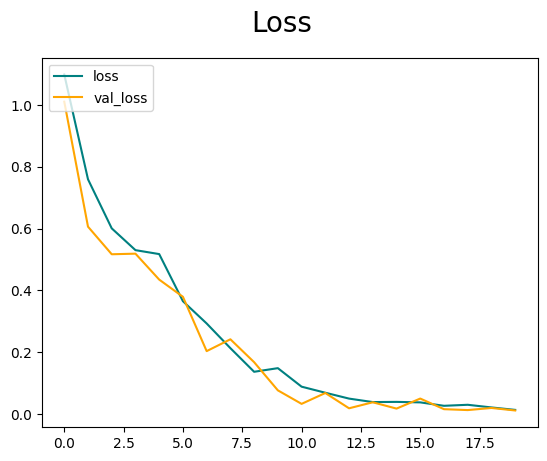

In [123]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

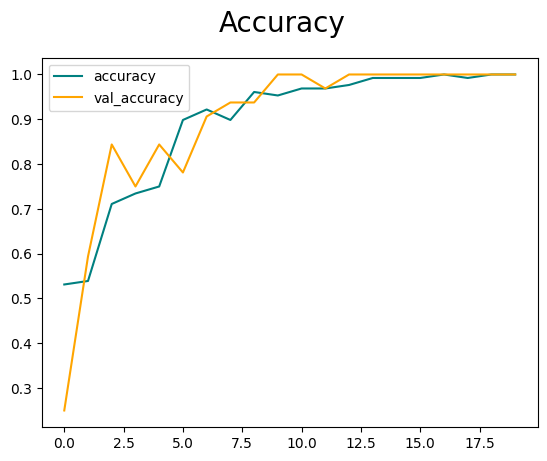

In [124]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [125]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [126]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [127]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 150ms/step


In [128]:
print(f'Precision:{pre.result().numpy()}')
print(f'Recall:{re.result().numpy()}')
print(f'Binary_Accuracy:{acc.result().numpy()}')

Precision:1.0
Recall:1.0
Binary_Accuracy:1.0


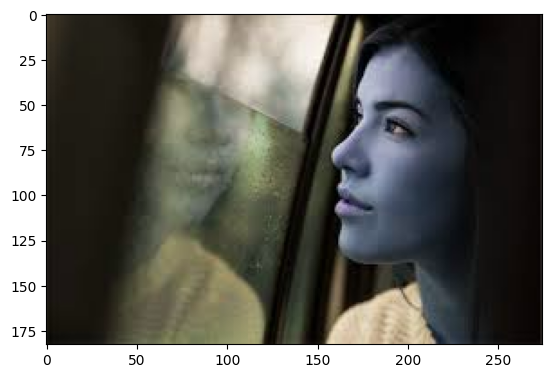

In [152]:
img = cv2.imread('img2.jpg')
plt.imshow(img)
plt.show()

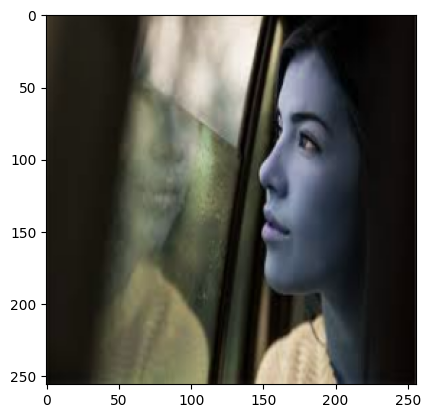

In [154]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [155]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [156]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat
if yhat < 0.5:
  print('Happy')
else:
  print('sad')

1/1 [==============================] - 0s 49ms/step
sad


In [157]:
from tensorflow.keras.models import load_model

In [158]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [161]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))
mood = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


In [162]:
mood
if mood < 0.5:
  print('Happy')
else:
  print('sad')

sad
